In [40]:
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
from math import radians, cos, sin, asin, sqrt
import matplotlib.ticker as ticker

# Functions that were used
def distance(lat1, long1, lat2, long2):
    long1 = radians(long1)
    long2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    r = 3956
    h = sin((lat2 - lat1)/ 2)**2 + cos(lat1) * cos(lat2) * sin((long2 - long1)/ 2)**2
    dist = 2 * r * asin(sqrt(h))
    return dist

def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

def distance(lat1, long1, lat2, long2):
    long1 = radians(long1)
    long2 = radians(long2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    r = 3956
    h = sin((lat2 - lat1)/ 2)**2 + cos(lat1) * cos(lat2) * sin((long2 - long1)/ 2)**2
    dist = 2 * r * asin(sqrt(h))
    return dist

def x_format(x_val, pos):
    return '{:.3f}'.format(x_val)

def y_format(y_val, pos):
    return '{:.3f}'.format(y_val)

In [41]:
# Location Data
long =[-83.9290300, -83.9259200, -83.9246300, -83.9263900, -83.9281400, -83.9268700,-83.9270100,-83.9294600,-83.9308100,-83.9321400,-83.9318800,-83.9336300,-83.9308100,-83.9273600,-83.9272100,-83.9343200,-83.9308100,-83.9297600,-83.9236600,-83.9240700,-83.9291300,-83.9307200,-83.9323000,-83.9288100,-83.9288600,-83.9286400,-83.9239190,-83.9252087,-83.9262703,-83.9338035,-83.9249062,-83.9250586,-83.9368156,-83.9235339,-83.9318294,-83.9322423,-83.9360961,-83.9309058,-83.9316165,-83.9317006,-83.9324349,-83.9363971,-83.9309273,-83.9239745,-83.9349595, -83.9360853, -83.9340153, -83.9242898, -83.9287277, -83.9300016, -83.9309214]
lat = [35.9568900,35.9574100,35.9586000,35.9591400,35.9585300,35.9591400,35.9588300,35.9582400,35.9547100,35.9535800,35.9524000,35.9529600,35.9547100,35.9533600,35.9520000,35.9488900,35.9547100,35.9550900,35.9558700,35.9577200,35.9526000,35.9519200,35.9540600,35.9535100,35.9540200,35.9557100,35.9534200,35.9603369,35.9562900,35.9520768,35.9569510,35.9582465,35.9509597,35.9567925,35.9581388,35.9532492,35.9523728,35.9561918,35.9547879,35.9564855,35.9603134,35.9505688,35.9565956,35.9565472,35.9529485,35.9525031,35.9521321,35.9573676,35.9520077,35.9593454,35.9577538]
building_name = ['University of Tennessee Student Union','Ayres Hall','Min Kao Building - Department of Electrical Engineering & Computer Science','Child and Family Studies','James D. Hoskins Library','Department of Microbiology','Ken and Blaire Mossman Building','University of Tennessee College of Law','Center for Global Engagement','Frieson Black Cultural Center','Temple Hall','University of Tennessee - Office of Equity and Diversity','Center for Global Engagement','Torchbearer Statue University of Tennessee','McClung Museum of Natural History & Culture','TRECS','Center for Global Engagement','John C. Hodges Library','Tickle College of Engineering','Dougherty Engineering Building - Department of Mechanical Aerospace and Biomedical Engineering','College of Architecture and Design','Natalie L. Haslam Music Center','St. John XXIII','Humanities and Social Sciences Building','McClung Tower','Haslam College of Business','Neyland Garage','11th St Parking Garage','Alumni Memorial Building','Carrick Hall North and South','College of Nursing','Dabney-Buehler Hall','Dogwood Hall','Ferris Hall','Frank G. Clement Hall','Fred D. Brown Hall','Geier Hall','Greve Hall','Hess Hall','Howard H. Baker Jr. Center for Public Policy','Laurel Hall','Magnolia Hall','Massey Hall','Perkins Hall','Reese Hall','Robinson Hall','Rocky Top Dining Hall','Science and Engineering Research Facility','Stokely Hall','Volunteer Hall','Strong Hall']
# print(pd.DataFrame(building_name, columns = ["Location"]))
    
# Get Input (# of buildings)
print("Select Number of Buildings (2 - 51) : ")
num_points = input("")
print(num_points)
num_points = int(num_points)
num_points_copy = num_points
building_array = []

# Get Input (Building Indexes)
while (num_points_copy != 0):
    print("Select Buildings (0 - 50) : ")
    input_value = int(input(""))
    if input_value < 0 or input_value > 50 :
        print(input_value, "is not valid input.")
    else:
        print(input_value)
        building_array.append(input_value)
        num_points_copy -= 1
        


Select Number of Buildings (2 - 51) : 
3
Select Buildings (0 - 50) : 
4
Select Buildings (0 - 50) : 
5
Select Buildings (0 - 50) : 
6


c:\Users\shid0\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
c:\Users\shid0\AppData\Local\Programs\Python\Python311\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


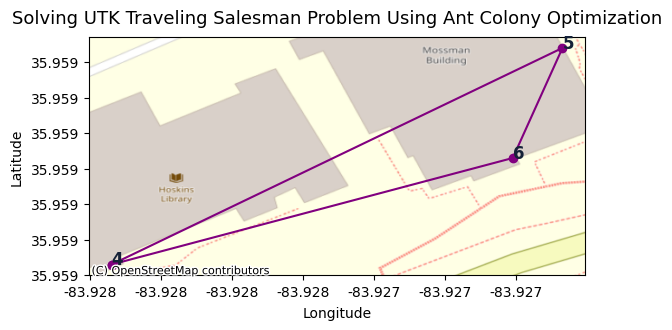

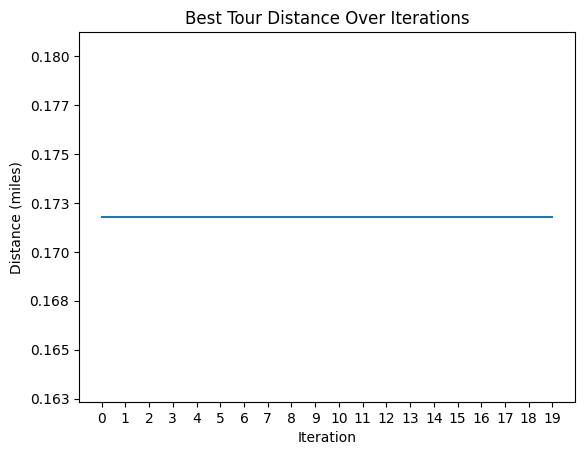

In [42]:
# Create new array with selected lat & long values
new_lat = np.array([lat[i] for i in building_array])
new_long = np.array([long[i] for i in building_array])

data = {'lat': new_lat, 'long': new_long}
df = pd.DataFrame(data)
distance_matrix = pd.DataFrame(index=df.index, columns=df.index)
arr_test = []
dist_arr = []

# Calculate distance based on longitude and latitude
for i in range(len(df)):
    for j in range(len(df)):
        distance_matrix.iloc[i,j] = distance(df['lat'][i], df['long'][i], df['lat'][j], df['long'][j])
        arr_test.append(distance(df['lat'][i], df['long'][i], df['lat'][j], df['long'][j]))
    dist_arr.append(arr_test.copy())
    arr_test =[]
distance_matrix = dist_arr
distance_matrix = np.array(distance_matrix)
# print(distance_matrix)

# Find best route
aca = ACA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=num_points, max_iter=20,
              distance_matrix=distance_matrix) 
best_x, best_y = aca.run()
best_points_ = np.concatenate([best_x, [best_x[0]]])
geometry = [Point(xy) for xy in zip(new_long,new_lat)]
best_geometry = [geometry[i] for i in best_points_]
best_geometry_array = np.array([(point.x, point.y) for point in best_geometry])
# print(best_points_) ## Use this array to get the most frequent array & compare with google map

# Getting map information
shape_file = "boundary.shp"
ward = gpd.read_file(shape_file, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry, crs = 4326)
ax = ward.plot(alpha=0.35, zorder=1, aspect='equal')

# Annotate each building index and connect each point
for index in range(0, num_points):
    ax.annotate(building_array[best_points_[index]], (best_geometry_array[index, 0], best_geometry_array[index, 1]), fontsize = 12, 
                color = '#152238', fontweight = 'bold')
# best_geometry_array = best_geometry_array[best_points_,:]
ax.plot(best_geometry_array[:, 0], best_geometry_array[:, 1], 'o-', color = '#81007f')

# Graph format
ax.set_title("Solving UTK Traveling Salesman Problem Using Ant Colony Optimization", fontsize = 13, pad = 10)
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(x_format))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_format))
ax.set_xlabel('Longitude', fontsize=10, labelpad=5)
ax.set_ylabel('Latitude', fontsize=10, labelpad=5)
plt.size = (8,6)
plt.show()

ax2 = pd.DataFrame(aca.y_best_history).cummin().plot(legend=None)
ax2.set_title("Best Tour Distance Over Iterations")
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Distance (miles)')
ax2.set_xticks(np.arange(0, 20, 1))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(y_format))
# ax2.legend(none)
# print(aca.y_best_history)
plt.size = (8,6)
plt.show()